In [182]:
import os
import glob
import pandas as pd
import numpy as np

class Ejector():
    def __init__(self, route_to_infractions='assetsfull/'):
        self.PATH = route_to_infractions
        self.column_names = ['hora', 'semaforo','direccion','cuantos','estado', 'placa','prob']
        self.column_names_eight = ['hora', 'semaforo','direccion','cuantos','estado', 'NONE','placa','prob']
        print('PATH IS', self.PATH)
        

    def _getDirectory(self):
        directory_list = list()
        for root, dirs, files in os.walk(self.PATH, topdown=False):
            for name in dirs:
                directory_list.append(os.path.join(root, name))
                
        return directory_list
    def _combineLists(self, listToProcess, norm):
        list_data_frames = list()
        list_data_frames_eight = list()
        counter = 0
        for infraction in listToProcess:
            try:
                df = pd.DataFrame.from_dict(infraction, orient='index')
                if norm is True:
                    df.columns = self.column_names 
                else:
                    pass
                list_data_frames.append(df)
            except Exception as e:
                for k, v in infraction.items():
                    if len(v) > 7:
                        #print('infraction  8 level is', infraction)
                        df_eigth = pd.DataFrame.from_dict(infraction, orient='index')
                        df_eigth.columns = self.column_names_eight
                        list_data_frames_eight.append(df_eigth)
                    else:
                        pass

                #print('this has not hve the format..')
                #print(e)
                #print(infraction)
                
        return list_data_frames, list_data_frames_eight

    def _getPandasdf(self, directory_list, norm):
        CAP_ROJOS = list()
        rojos = list()
        amarillos = list()
        verde = list()
                
        # Iterate over all the folders
        for i, folder in enumerate(directory_list):
            # Place Holder for the information to be appendend in lists
            infraction = {}
            
            # Split this folders by / 
            splited = folder.split('/') # for the i element in the list, create a auxi split list  
            information, date = splited[-1], splited[-2] # get the last two element of this list
            
            # split the information array with _     
            granular_information = information.split('_')
            #granular_information.append(date.split('_')[0])
            # append the information to his respective list 
            if ('ROJO' in granular_information):
                #infraction['information'] = granular_information
                infraction[date.split('_')[0]] = granular_information
                CAP_ROJOS.append(infraction)
            elif ('rojo' in granular_information) or ('Rojo' in granular_information):
                #infraction['information'] = granular_information
                infraction[date.split('_')[0]] = granular_information
                rojos.append(infraction)
            elif ('amarillo' in granular_information) or ('Amarillo' in granular_information):
                #infraction['information'] = granular_information
                infraction[date.split('_')[0]] = granular_information
                amarillos.append(infraction)
            elif ('verde' in granular_information) or ('VERDE' in granular_information) or ("Verde" in granular_information):
                infraction[date.split('_')[0]] = granular_information
                verde.append(infraction)
            else:
                pass#print('This not have lavel')
            
        # Convine all the lists
        ROJOS_list, ROJOS_list_eigth = self._combineLists(CAP_ROJOS,norm)
        rojos_list, rojos_list_eigth = self._combineLists(rojos,norm)
        amarillos_list, amarillos_list_eigth = self._combineLists(amarillos,norm)
        verde_list, verde_list_eigth = self._combineLists(verde,norm)
        
        # Concat lists
        ROJOS_CAP = pd.concat(ROJOS_list)
        rojos = pd.concat(rojos_list)
        amarillos = pd.concat(amarillos_list)
        verde = pd.concat(verde_list)
        
        ROJOS_CAP_eigth = pd.concat(ROJOS_list_eigth)
        rojos_eigth = pd.concat(rojos_list_eigth)
        amarillos_eigth = pd.concat(amarillos_list_eigth)
        verde_eigth = pd.concat(verde_list_eigth)
        
        # Reset indexes
        ROJOS_CAP = ROJOS_CAP.reset_index()
        rojos = rojos.reset_index()
        amarillos = amarillos.reset_index()
        verde = verde.reset_index()
        
        ROJOS_CAP_eigth = ROJOS_CAP_eigth.reset_index()
        rojos_eigth = rojos_eigth.reset_index()
        amarillos_eigth = amarillos_eigth.reset_index()
        verde_eigth = verde_eigth.reset_index()
        
        EIGHT_df = [ROJOS_CAP_eigth, rojos_eigth, amarillos_eigth, verde_eigth]
        
        return ROJOS_CAP, rojos, amarillos, verde, EIGHT_df
    
    def __call__(self, norm=True):
        directory_list = self._getDirectory()
        return self._getPandasdf(directory_list, norm)
    
theEjector = Ejector()   
R,r,y,g, EIGTH_df = theEjector()

PATH IS assetsfull/


In [183]:
print(R.shape)
print(r.shape)
print(y.shape)
print(g.shape)
# R['prob'] = R['prob'].astype(int)
#R[R['prob'] == 100]
df_seven = pd.concat([R,y,r,g])
print(df.shape)

# /////////////////////////////////////////////////
# /////////////////////////////////////////////////
print('EIGHT DF')
print(EIGTH_df[0].shape)
print(EIGTH_df[1].shape)
print(EIGTH_df[2].shape)
print(EIGTH_df[3].shape)

df_eigth = pd.concat(EIGTH_df)
print(df_eigth.shape)

(599, 8)
(506, 8)
(195, 8)
(4, 8)
(2092, 9)
EIGHT DF
(396, 9)
(386, 9)
(4, 9)
(2, 9)
(788, 9)


In [184]:
df_seven.head()

,index,hora,semaforo,direccion,cuantos,estado,placa,prob
0,2018-02-07,14-23-23,ROJO,directo,x1,-Infraccion,4481CKL,100
1,2018-02-07,11-11-15,ROJO,directo,x1,-Infraccion,2198PYT,100
2,2018-02-07,11-38-41,ROJO,directo,x1,-Infraccion,2915GHF,100
3,2018-02-07,09-38-48,ROJO,directo,x1,-Infraccion-PlacaNoVisible,638USR,100
4,2018-02-07,15-20-38,ROJO,directo,x1,-Infraccion,2856IRI,100


In [185]:
df_eigth.head()

,index,hora,semaforo,direccion,cuantos,estado,NONE,placa,prob
0,2018-02-12,14-42-25,ROJO,izquierda,x1,-Infraccion,,4564LKF,100
1,2018-02-12,08-33-24,ROJO,directo,x1,-Infraccion,,2273PLB,100
2,2018-02-12,11-56-54,ROJO,directo,x1,-Infraccion-Duplicado,,1226XCS,100
3,2018-02-12,07-27-38,ROJO,directo,x1,-Infraccion,,4028BAD,100
4,2018-02-12,08-37-47,ROJO,directo,x1,-Infraccion,,4263PDN,100


In [186]:
# Drop None COlumn
df_eigth = df_eigth.drop(['NONE'], axis=1)
df_eigth.head()

,index,hora,semaforo,direccion,cuantos,estado,placa,prob
0,2018-02-12,14-42-25,ROJO,izquierda,x1,-Infraccion,4564LKF,100
1,2018-02-12,08-33-24,ROJO,directo,x1,-Infraccion,2273PLB,100
2,2018-02-12,11-56-54,ROJO,directo,x1,-Infraccion-Duplicado,1226XCS,100
3,2018-02-12,07-27-38,ROJO,directo,x1,-Infraccion,4028BAD,100
4,2018-02-12,08-37-47,ROJO,directo,x1,-Infraccion,4263PDN,100


In [187]:
# MERge all the datasets df and df_eight  into one
df = pd.concat([df_seven, df_eigth])
print(df.shape)
df.head()

(2092, 8)


,index,hora,semaforo,direccion,cuantos,estado,placa,prob
0,2018-02-07,14-23-23,ROJO,directo,x1,-Infraccion,4481CKL,100
1,2018-02-07,11-11-15,ROJO,directo,x1,-Infraccion,2198PYT,100
2,2018-02-07,11-38-41,ROJO,directo,x1,-Infraccion,2915GHF,100
3,2018-02-07,09-38-48,ROJO,directo,x1,-Infraccion-PlacaNoVisible,638USR,100
4,2018-02-07,15-20-38,ROJO,directo,x1,-Infraccion,2856IRI,100


In [188]:
# save to disk as csv file 

df.to_csv("montecinos_data.csv", encoding='utf-8', sep=',', index=False)

In [71]:
# Check unique elements in index

unique_words = sorted(np.unique(df['estado'].tolist()))
unique_days = sorted(np.unique(df['index'].tolist()))
print('Unique days are : ', unique_days)
print('How many days : ', len(unique_days))
print('....................................')
print('Unique Words : ', unique_words)
print('How many unique comments : ', len(unique_words))

Unique days are :  ['13-44-55', '13-52-26', '2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13', '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-24']
How many days :  25
....................................
Unique Words :  ['', '-', '-Adelantado', '-Altavelocidad', '-BUG', '-Bicicleta', '-CONGESTIONDespintado', '-Camara', '-DESPINTADO', '-FLOTA', '-GENTE', '-Infraccion', '-Infraccion-Adelantado', '-Infraccion-Alejado', '-Infraccion-Ambulancia', '-Infraccion-Argentina', '-Infraccion-Borroso', '-Infraccion-Camion', '-Infraccion-Camion-Duplicado', '-Infraccion-CasiAtropella', '-Infraccion-Chileno', '-Infraccion-Colectivo', '-Infraccion-Cortado', '-Infraccion-Despintado', '-Infraccion-Doble', '-Infraccion-Duplicado', '-Infraccion-GiroDerecha', '-Infraccion-Moto', '-Infraccion-P

# Filter one week of work

In [114]:
# Group by aviable days in unique_days
df_by_days = []
for day in unique_days:
    # Filter by aviable days
    single_day = df[df['index'] == day]
    # Sort by hour
    single_day = single_day.sort_values('hora')
    # COnvert prob to integer value
    single_day['prob'] = single_day['prob'].astype(int)
    # Append to aux list
    df_by_days.append(single_day)
    
print(len(df_by_days))
df_by_days[1].head()

25


,index,hora,semaforo,direccion,cuantos,estado,placa,prob
460,13-52-26,13-11-19,Rojo,directo,x1,-RuidoAdelantado,x,0
521,13-52-26,13-24-33,ROJO,directo,x1,-Infraccion,2499DGI,100
459,13-52-26,13-47-55,Rojo,directo,x1,-PlacaDespintada,638XxY,84


In [126]:
# Join one Week of work
one_week = pd.concat(df_by_days[0:14])

print(one_week.shape)
one_week.head()

(1703, 8)


,index,hora,semaforo,direccion,cuantos,estado,placa,prob
522,13-44-55,13-24-33,ROJO,directo,x1,-Infraccion,2499DGI,100
460,13-52-26,13-11-19,Rojo,directo,x1,-RuidoAdelantado,x,0
521,13-52-26,13-24-33,ROJO,directo,x1,-Infraccion,2499DGI,100
459,13-52-26,13-47-55,Rojo,directo,x1,-PlacaDespintada,638XxY,84
315,2018-02-01,06-03-44,ROJO,directo,x1,-pocaluz-blur,xxxxx,0


In [127]:
print(one_week['prob'].groupby(one_week['estado']).describe())

                             count        mean        std    min    25%  \
estado                                                                    
                               1.0    0.000000        NaN    0.0    0.0   
-                            142.0   92.401408  22.986601    0.0  100.0   
-Adelantado                    1.0    0.000000        NaN    0.0    0.0   
-Altavelocidad                 1.0    0.000000        NaN    0.0    0.0   
-BUG                           1.0    0.000000        NaN    0.0    0.0   
-Bicicleta                     1.0    0.000000        NaN    0.0    0.0   
-CONGESTIONDespintado          1.0    0.000000        NaN    0.0    0.0   
-Camara                        1.0    0.000000        NaN    0.0    0.0   
-DESPINTADO                    1.0   26.000000        NaN   26.0   26.0   
-FLOTA                         2.0    0.000000   0.000000    0.0    0.0   
-GENTE                         1.0    0.000000        NaN    0.0    0.0   
-Infraccion              

estado
                               AxesSubplot(0.125,0.125;0.775x0.755)
-                              AxesSubplot(0.125,0.125;0.775x0.755)
-Adelantado                    AxesSubplot(0.125,0.125;0.775x0.755)
-Altavelocidad                 AxesSubplot(0.125,0.125;0.775x0.755)
-BUG                           AxesSubplot(0.125,0.125;0.775x0.755)
-Bicicleta                     AxesSubplot(0.125,0.125;0.775x0.755)
-CONGESTIONDespintado          AxesSubplot(0.125,0.125;0.775x0.755)
-Camara                        AxesSubplot(0.125,0.125;0.775x0.755)
-DESPINTADO                    AxesSubplot(0.125,0.125;0.775x0.755)
-FLOTA                         AxesSubplot(0.125,0.125;0.775x0.755)
-GENTE                         AxesSubplot(0.125,0.125;0.775x0.755)
-Infraccion                    AxesSubplot(0.125,0.125;0.775x0.755)
-Infraccion-Ambulancia         AxesSubplot(0.125,0.125;0.775x0.755)
-Infraccion-Argentina          AxesSubplot(0.125,0.125;0.775x0.755)
-Infraccion-Borroso            AxesSubplo

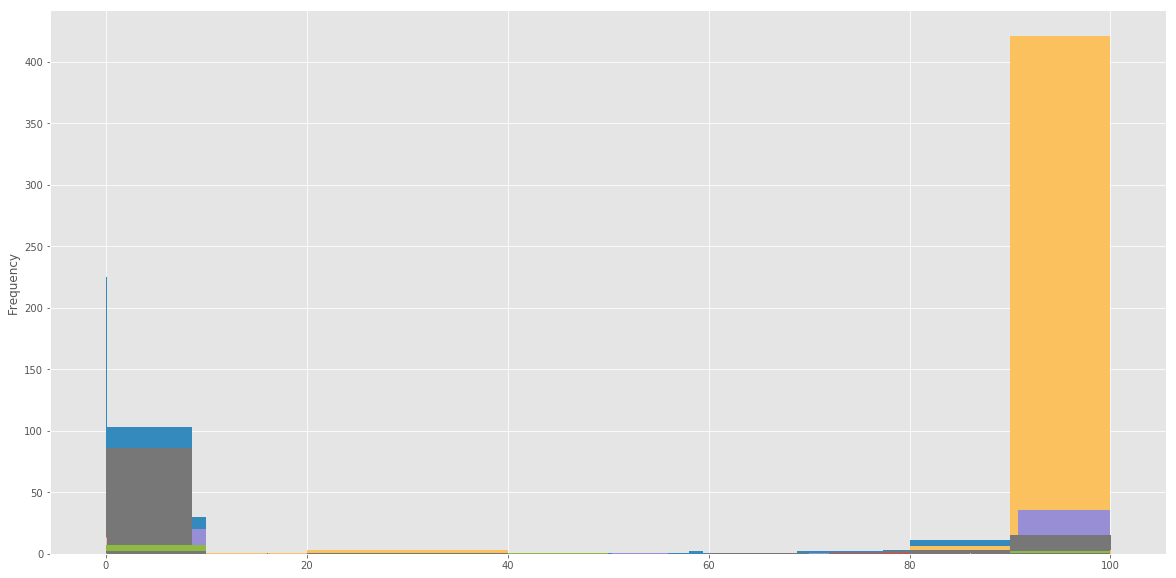

In [128]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

one_week['prob'].groupby(one_week['estado'] ).plot(kind='hist')
#ax.legend( frameon=False)

In [129]:
one_week = one_week[(one_week['semaforo'] == 'ROJO') & (one_week['estado'] != '-SINPINTAR') & \
                    (one_week['estado'] != '-pocaluz-lento-blur')&
                   (one_week['estado'] != '-lento') &
                   (one_week['estado'] != '-sinpintar') &
                   (one_week['estado'] != '-blur') &
                   (one_week['estado'] != '-ruido') &
                   (one_week['estado'] != '-bicibleta') &
                   (one_week['estado'] != '-rapido') &
                   (one_week['estado'] != '-muylento') &
                   (one_week['estado'] != '-bicicleta') &
                   (one_week['estado'] != '-muyabajo') &
                   (one_week['estado'] != '-bicileta') &
                   (one_week['estado'] != '-ruidoadelantado') &
                   (one_week['estado'] != '-ruidoadelntado') &
                   (one_week['estado'] != '-sinPlaca') &
                   (one_week['estado'] != '-sinplaca') &
                   (one_week['estado'] != '-sucio') &
                   (one_week['estado'] != '-pedestrian')
                   ]  

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [131]:
datetime_rowid = one_week['hora'].map(lambda t: pd.to_datetime(t, format='%H-%M-%S'))
one_week.index = datetime_rowid
print(one_week.shape)
one_week.head()

(750, 8)


,index,hora,semaforo,direccion,cuantos,estado,placa,prob
hora,,,,,,,,
1900-01-01 13:24:33,13-44-55,13-24-33,ROJO,directo,x1,-Infraccion,2499DGI,100
1900-01-01 13:24:33,13-52-26,13-24-33,ROJO,directo,x1,-Infraccion,2499DGI,100
1900-01-01 06:03:44,2018-02-01,06-03-44,ROJO,directo,x1,-pocaluz-blur,xxxxx,0
1900-01-01 06:03:56,2018-02-01,06-03-56,ROJO,directo,x1,-pocaluz-blur,xxxxx,0
1900-01-01 06:21:58,2018-02-01,06-21-58,ROJO,directo,x1,-pocaluz-blur,xxxxx,0


In [132]:
daily = one_week['prob'].resample('H')
daily_mean = daily.mean()

In [133]:
daily_mean

hora
1900-01-01 06:00:00     9.785124
1900-01-01 07:00:00    62.150000
1900-01-01 08:00:00    91.727273
1900-01-01 09:00:00    94.419753
1900-01-01 10:00:00    95.911111
1900-01-01 11:00:00    96.078431
1900-01-01 12:00:00    99.043478
1900-01-01 13:00:00    94.339623
1900-01-01 14:00:00    97.909091
1900-01-01 15:00:00    99.285714
1900-01-01 16:00:00    92.863636
1900-01-01 17:00:00    87.000000
1900-01-01 18:00:00    52.869565
1900-01-01 19:00:00     7.142857
1900-01-01 20:00:00     0.000000
Freq: H, Name: prob, dtype: float64

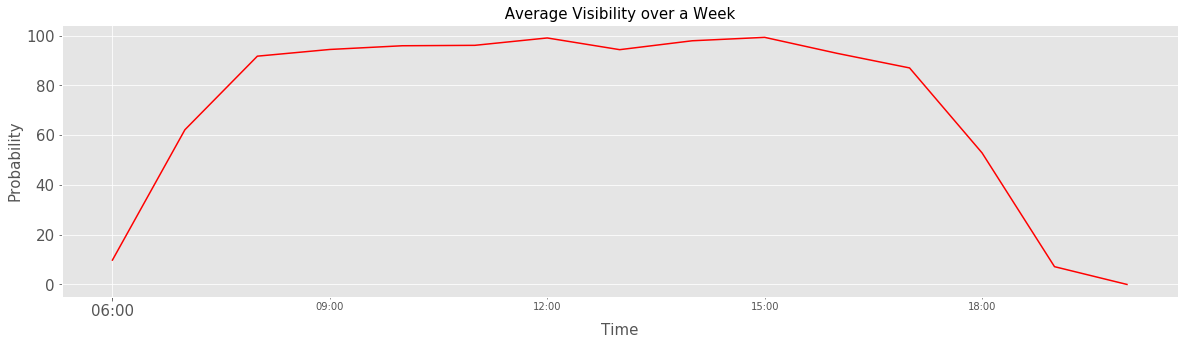

In [134]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
#one_week['prob'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')
ax.set_title(' Average Visibility over a Week ')
ax.set_xlabel('Time')
ax.set_ylabel('Probability')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
#plt.savefig('infractions_mean.png', format='png', dpi=500)

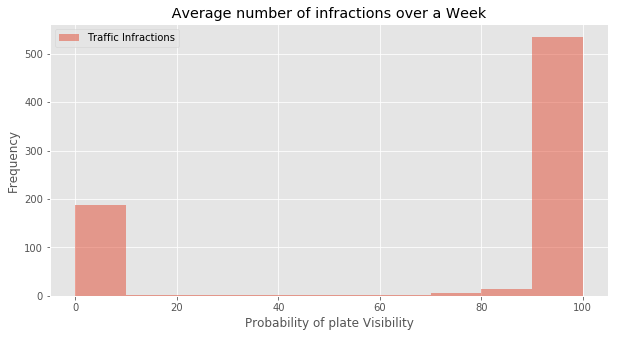

In [101]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
one_week.plot.hist(alpha=0.5, figsize=(10,5), ax = ax)
ax.set_title(' Average number of infractions over a Week ')
ax.legend(["Traffic Infractions"])
ax.set_xlabel('Probability of plate Visibility')
plt.savefig('histogram.png', format='png', dpi=500)

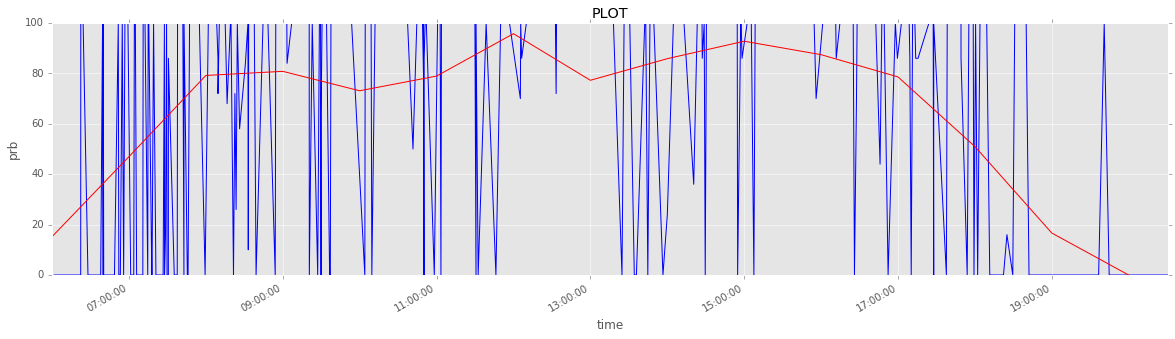

In [109]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
one_week['prob'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')
ax.set_title('PLOT')
ax.set_xlabel('time')
ax.set_ylabel('prb')
plt.savefig('infractions.png', format='png', dpi=300)

# ONe MONTH AVERAGE

In [194]:
df['prob'] = df['prob'].astype(int)
df['date'] = df['index'] + ' ' + df['hora']
print(df.shape)
df.head()

(2092, 9)


,index,hora,semaforo,direccion,cuantos,estado,placa,prob,date
date,,,,,,,,,
2018-02-07 14:23:23,2018-02-07,14-23-23,ROJO,directo,x1,-Infraccion,4481CKL,100,2018-02-07 14-23-23
2018-02-07 11:11:15,2018-02-07,11-11-15,ROJO,directo,x1,-Infraccion,2198PYT,100,2018-02-07 11-11-15
2018-02-07 11:38:41,2018-02-07,11-38-41,ROJO,directo,x1,-Infraccion,2915GHF,100,2018-02-07 11-38-41
2018-02-07 09:38:48,2018-02-07,09-38-48,ROJO,directo,x1,-Infraccion-PlacaNoVisible,638USR,100,2018-02-07 09-38-48
2018-02-07 15:20:38,2018-02-07,15-20-38,ROJO,directo,x1,-Infraccion,2856IRI,100,2018-02-07 15-20-38


In [195]:
datetime_rowid = df['date'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H-%M-%S'))
df.index = datetime_rowid
print(df.shape)
df.head()

(2092, 9)


,index,hora,semaforo,direccion,cuantos,estado,placa,prob,date
date,,,,,,,,,
2018-02-07 14:23:23,2018-02-07,14-23-23,ROJO,directo,x1,-Infraccion,4481CKL,100,2018-02-07 14-23-23
2018-02-07 11:11:15,2018-02-07,11-11-15,ROJO,directo,x1,-Infraccion,2198PYT,100,2018-02-07 11-11-15
2018-02-07 11:38:41,2018-02-07,11-38-41,ROJO,directo,x1,-Infraccion,2915GHF,100,2018-02-07 11-38-41
2018-02-07 09:38:48,2018-02-07,09-38-48,ROJO,directo,x1,-Infraccion-PlacaNoVisible,638USR,100,2018-02-07 09-38-48
2018-02-07 15:20:38,2018-02-07,15-20-38,ROJO,directo,x1,-Infraccion,2856IRI,100,2018-02-07 15-20-38


In [196]:
daily = df['prob'].resample('D')
daily_mean = daily.mean()

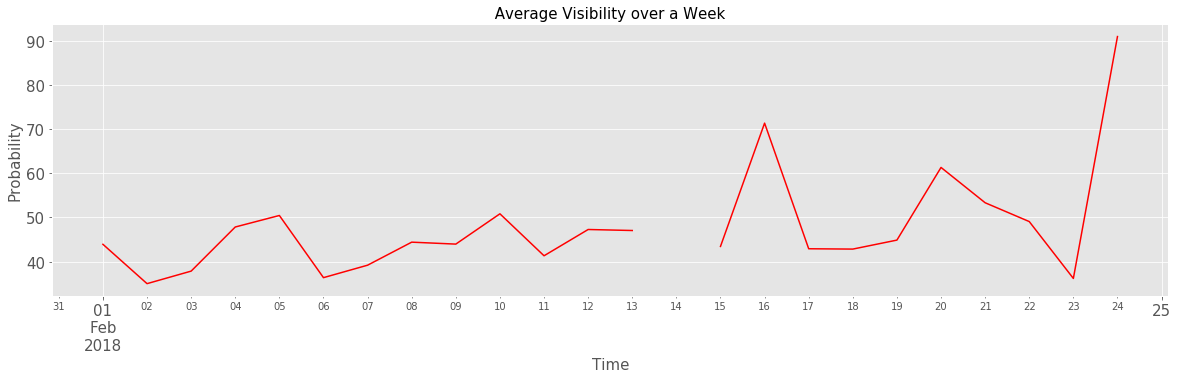

In [197]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
#one_week['prob'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')
ax.set_title(' Average Visibility over a Week ')
ax.set_xlabel('Time')
ax.set_ylabel('Probability')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
#plt.savefig('infractions_mean.png', format='png', dpi=500)